An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course
4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course
5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
file_data=pd.read_csv('StudentsPerformance.csv')

In [2]:
file_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Qn.1. Find out how many males and females participated in the test.

In [3]:
gender_split=file_data.groupby('gender').size()
print("Female participants =",gender_split['female'],"and male participants =",gender_split['male'])

Female participants = 518 and male participants = 482


# Qn.2. What do you think about the students' parental level of education?

In [4]:
education_split=file_data.groupby('parental level of education').size().sort_values(ascending=False)
print(education_split)
print("Most of the students' parents has the education level of :",education_split.nlargest(1).idxmax(),
      "and the count is",education_split.nlargest().max())


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64
Most of the students' parents has the education level of : some college and the count is 226


And the picture representation of the count is shown below

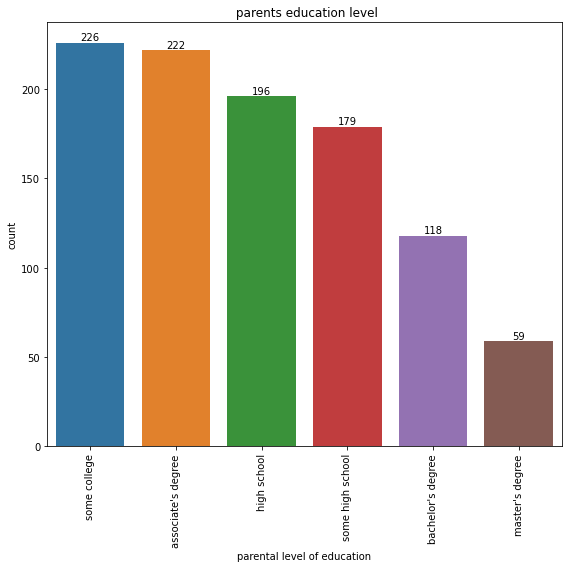

In [5]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x = 'parental level of education',
              data = file_data,
              order = file_data['parental level of education'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title(" parents education level")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Qn.3.Who scores the most on average for math, reading and writing based on ● Gender ● Test preparation course

In [6]:
stu_data=file_data.groupby('gender')['math score','reading score','writing score'].mean()
#file_data['math score'][ file_data['gender'] == "male" ].mean()
print(stu_data)
print("\n\n",stu_data.idxmax())

        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


 math score         male
reading score    female
writing score    female
dtype: object


The average scores are shown grouped by gender. 

above data shows that in Maths, male students scored more and in reading and writing , female students scored more

In [7]:
stu_data=file_data.groupby('test preparation course')['math score','reading score','writing score'].mean()
print(stu_data)
print("\n\n",stu_data.idxmax())

                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


 math score       completed
reading score    completed
writing score    completed
dtype: object


The average scores are shown grouped by 'test preparation course'. 

above data shows that in Math , reading and writing , students who completed the test preparation course scored more

# Qn.4.What do you think about the scoring variation for math, reading and writing based on ● Gender ● Test preparation course


In [8]:
print(file_data.groupby('gender').agg({'math score': ['var', 'mean']}),"\n\n")
print(file_data.groupby('gender').agg({'reading score': ['var', 'mean']}),"\n\n")
print(file_data.groupby('gender').agg({'writing score': ['var', 'mean']}),"\n\n")

#dataframe = pd.DataFrame(file_data, columns = ['gender', 'math score', 'reading score', 'writing score'])
#rslt_df = dataframe.loc[dataframe['gender'] == 'male']
#file_data['math score'][ file_data['gender'] == "male" ].var()
#print(rslt_df['math score'].mean())

    

        math score           
               var       mean
gender                       
female  256.958593  63.376448
male    211.889097  68.821577 


       reading score           
                 var       mean
gender                         
female    207.677438  72.590734
male      200.211010  65.545643 


       writing score           
                 var       mean
gender                         
female    220.369327  72.467181
male      202.413924  63.446058 




In [9]:
print(file_data.groupby('test preparation course').agg({'math score': ['var', 'mean']}),"\n\n")
print(file_data.groupby('test preparation course').agg({'reading score': ['var', 'mean']}),"\n\n")
print(file_data.groupby('test preparation course').agg({'writing score': ['var', 'mean']}),"\n\n")

                         math score          
                                var      mean
test preparation course                      
completed                210.884027  69.96648
none                     246.668662  63.78972 


                        reading score           
                                  var       mean
test preparation course                         
completed                  183.265864  74.175978
none                       213.419851  66.417445 


                        writing score           
                                  var       mean
test preparation course                         
completed                  175.202612  74.684358
none                       226.251739  64.457944 




# Qn. 5 The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [10]:
df = pd.DataFrame(file_data,columns = ['gender', 'math score','reading score','writing score'])
#25% count is calculated
#df.shape[0]
bonus_stu=int(len(df)/4)

# sorted values by math score in descending order and top 25% data is taken for process
rslt_df=df.sort_values(by='math score',ascending=False).head(bonus_stu) 
#new column is added to the result dataframe with null values
rslt_df['bonus points']=pd.NaT

# iterate over rows with iterrows()
for index, row in rslt_df.iterrows():
    if (row['math score']>=99):
        pt=10
    elif(row['math score']>95):
        pt=8
    elif(row['math score']>90):
        pt=7
    else:
        pt=5
#bonus point is added to the corresponding row
    rslt_df.at[index, 'bonus points'] = pt

print(rslt_df)


     gender  math score  reading score  writing score bonus points
999    male         100            100            100           10
996    male         100             96             86           10
515  female         100             92             97           10
517  female         100            100            100           10
516  female         100            100            100           10
..      ...         ...            ...            ...          ...
856    male          77             76             77            5
855    male          77             69             68            5
854    male          77             68             69            5
853    male          77             78             73            5
852    male          77             62             64            5

[250 rows x 5 columns]
